In [194]:
import pandas as pd            
from textblob import TextBlob  
from itertools import islice    

In [195]:
df_survey_data = pd.read_csv("tweetersnotime (2).csv")
df_survey_data.head()

,Tweets
0,"b""Let's Honour the time of Jumu'ah and engage ..."
1,b'These people are #Corona #virus of our count...
2,b'Please cancel ram mela in UP @myogiadityanat...
3,b'@TheEllenShow calling her celebrity friends ...
4,"b""Protect from Corona Virus. Follow these do's..."


In [196]:
COLS = ['text', 'sentiment','subjectivity','polarity']
df = pd.DataFrame(columns=COLS)

In [197]:
#for index in df_survey_data.iterrows():
 #   print(index[1])
#print(df_survey_data.to_string(index=False))
tweets = df_survey_data.values
#weets[1][0]

for i in range(0,len(tweets)):
    
     new_entry = []
     
     text_lower = tweets[i][0].lower()
     
     blob = TextBlob(text_lower)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [text_lower,sentiment,subjectivity,polarity]
        
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_survey_sentimet_df, ignore_index=True)
    
df.to_csv('Corona_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")  

In [198]:
'''
for index, row in islice(df_survey_data.iterrows(), 0, None):

     new_entry = []
     text_lower=(row['Tweets'])

     blob = TextBlob(text_lower)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [text_lower,sentiment,subjectivity,polarity]
        
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_survey_sentimet_df, ignore_index=True)
		 
df.to_csv('Corona_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")
'''

'\nfor index, row in islice(df_survey_data.iterrows(), 0, None):\n\n     new_entry = []\n     text_lower=(row[\'Tweets\'])\n\n     blob = TextBlob(text_lower)\n     sentiment = blob.sentiment\n     polarity = sentiment.polarity\n     subjectivity = sentiment.subjectivity\n     new_entry += [text_lower,sentiment,subjectivity,polarity]\n        \n     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)\n     df = df.append(single_survey_sentimet_df, ignore_index=True)\n\t\t \ndf.to_csv(\'Corona_Text_Sentiment_Values.csv\', mode=\'w\', columns=COLS, index=False, encoding="utf-8")\n'

In [199]:
df.head()
#print(df)

,text,sentiment,subjectivity,polarity
0,"b""let's honour the time of jumu'ah and engage ...","(0.0, 0.0)",0.000000,0.000000
1,b'these people are #corona #virus of our count...,"(0.0, 0.0)",0.000000,0.000000
2,b'please cancel ram mela in up @myogiadityanat...,"(0.0, 0.0)",0.000000,0.000000
3,b'@theellenshow calling her celebrity friends ...,"(0.13636363636363635, 0.45454545454545453)",0.454545,0.136364
4,"b""protect from corona virus. follow these do's...","(0.0, 0.0)",0.000000,0.000000


In [200]:
df.describe()

,subjectivity,polarity
count,1080.000000,1080.000000
mean,0.304756,0.085205
std,0.321548,0.263128
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.250000,0.000000
75%,0.516667,0.177778
max,1.000000,1.000000


In [201]:
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]

In [202]:
dffilter.describe()

,subjectivity,polarity
count,646.000000,646.000000
mean,0.509500,0.142448
std,0.261696,0.328110
min,0.000000,-1.000000
25%,0.323295,-0.025000
50%,0.500000,0.125000
75%,0.666667,0.350000
max,1.000000,1.000000


Text(0, 0.5, 'Range')

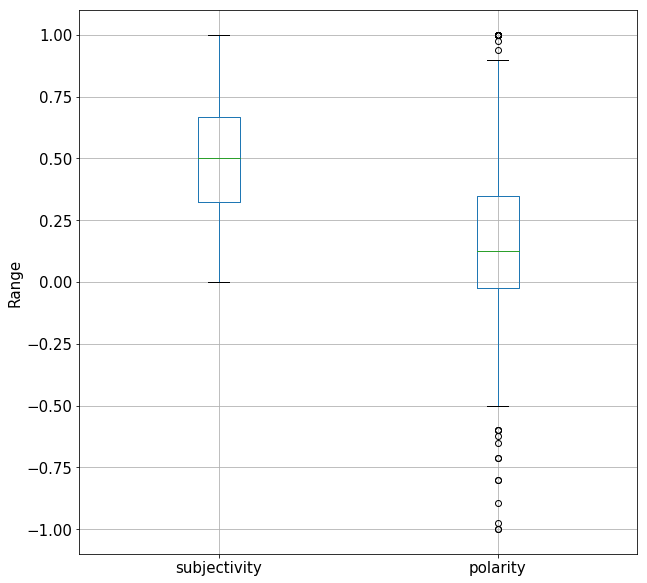

In [203]:
import matplotlib.pyplot as plt

boxplot = dffilter.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))

plt.ylabel('Range')

c:\users\ak pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


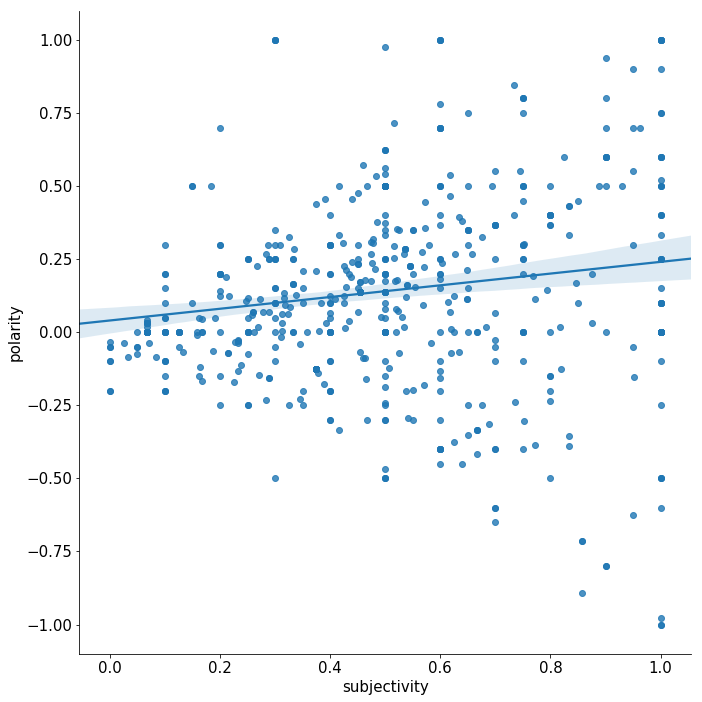

In [204]:
import seaborn as sns 

sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True, height=10,palette="mute") 


In [205]:
#covariance and correlation for dffilter
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.06848472 0.08222222]
 [0.08222222 0.20361579]]
Pearsons correlation: 0.69628


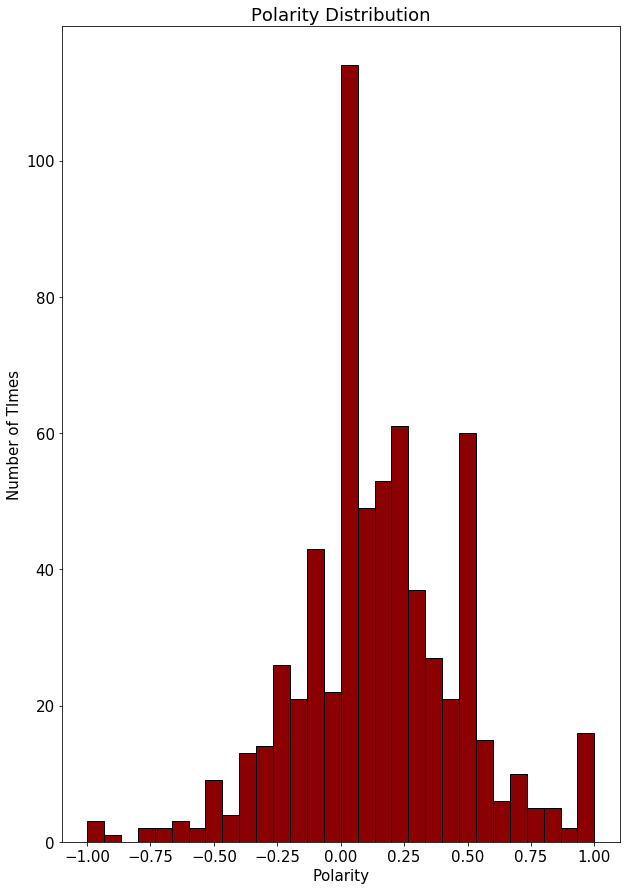

In [206]:
#Polarity Distribution for dffilter

plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

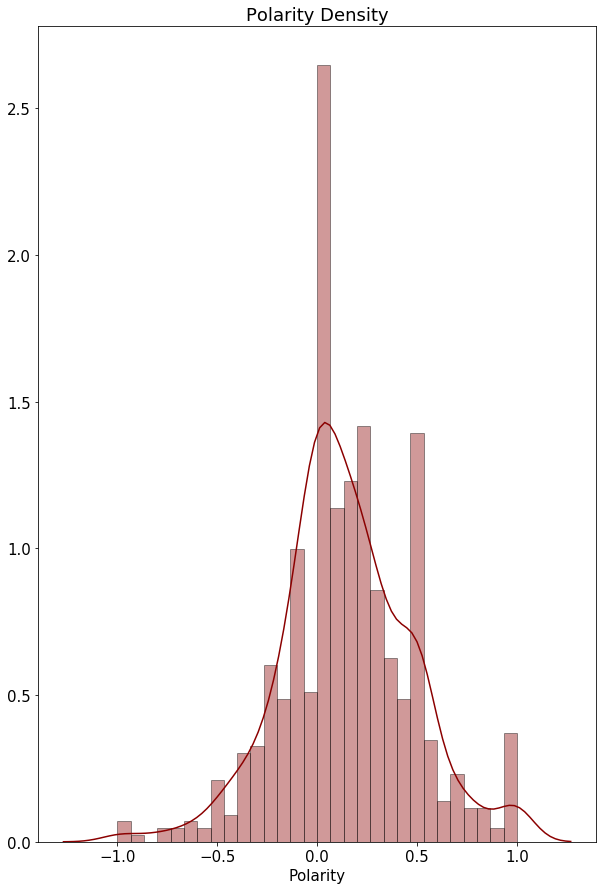

In [207]:
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [230]:
import nltk
#nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

words = (df.text
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'',r'#',r'b', RE_stopwords], [' ', '','','','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)



new_words = []

for w in words:
    if w not in RE_stopwords and len(w) > 5 and '#' not in w and '\\' not in w and '//' not in w:
        new_words.append(w)

print(new_words)


['"let\'s', 'honour', "jumu'ah", 'engage', 'worship', "'these", 'people', 'country--', "'please", 'cancel', '@myogiadityanath', 'threat', 'charges', 'attempt', "'@theellenshow", 'calling', 'celerity', 'friends', 'favourite', '"protect', 'corona', 'virus.', 'follow', 'milestone', 'covid-19', 'educational', "'there", 'complete', 'lockdown', 'states', '20days', 'control', 'spread', 'answer', 'government', 'planning', 'thousands', 'indians', '"\'don\'t', 'travel', 'unless', 'really', 'london', 'trains', 'non-screen', 'learning', 'friends', 'wesite', 'pandemic', 'announces', 'infection', 'locally', "'@officeofut", '@pratapsarnaik', 'management', 'indian', '@cmomaharashtra', 'making', 'isolation', 'center', 'iogents', 'prepared.', 'message', 'customers', 'partners.', "'@inckinju", '@impnahar99', '@narendramodi', 'putrid,sadist', 'culture', 'pervert', 'upringing', 'evident', 'commerce', 'estalishments', "'reaking", 'confirmed', '(where', 'corona', 'responding', 'pandemic', 'respiratory', 'dis

In [231]:
from collections import Counter

# generate DF out of Counter
for w in df.text :
    if w not in RE_stopwords  :
        rslt = pd.DataFrame(Counter(new_words).most_common(10), columns=['Word', 'Frequency']).set_index('Word')


rslt

,Frequency
Word,
people,49
corona,45
coronavirus,24
spread,21
social,20
happened,18
gandhi,17
manmohan,16
covid-19,15


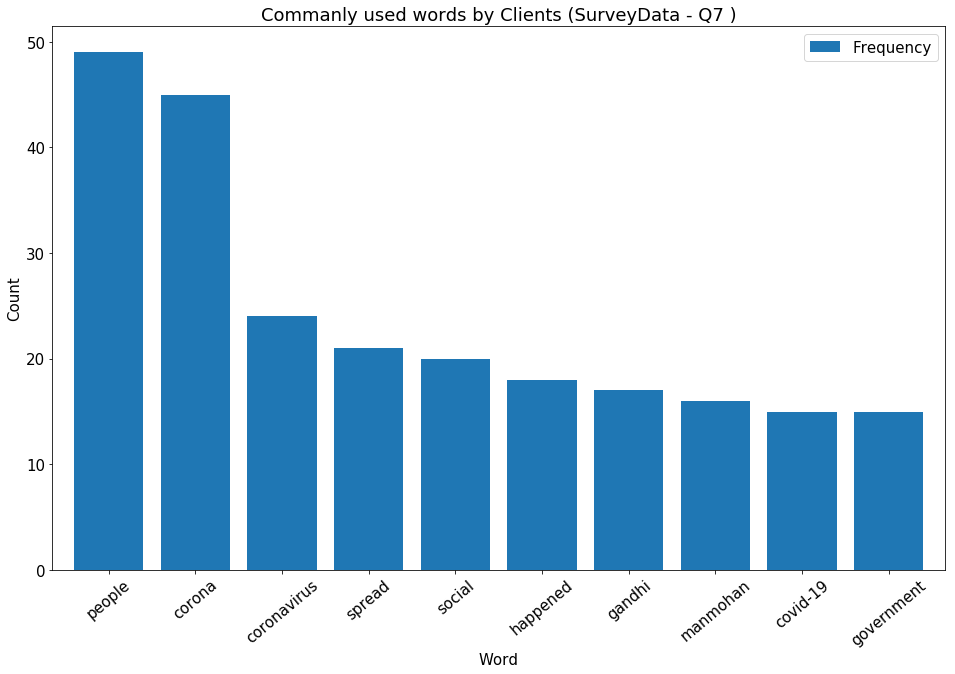

In [222]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words by Clients (SurveyData - Q7 )")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15



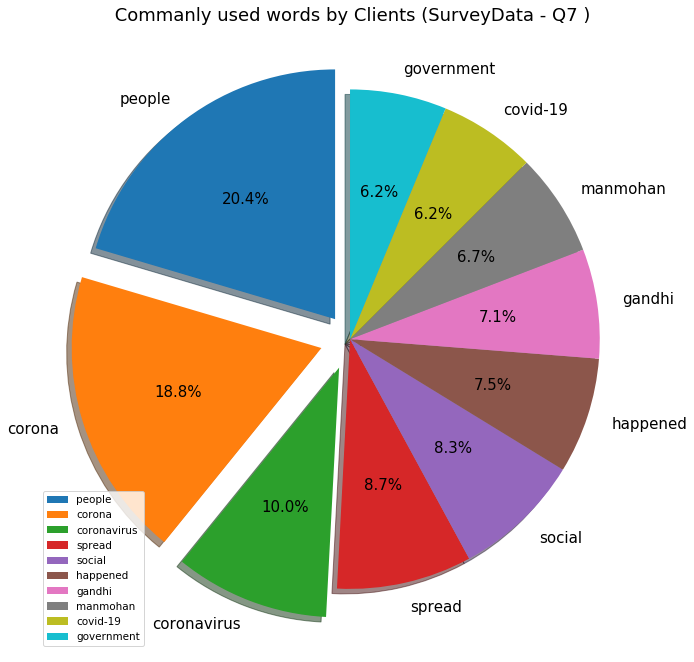

In [223]:
#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['people',
        'corona',
        'coronavirus',
        'spread',
        'social',
        'happened',
        'gandhi',
        'manmohan',
        'covid-19',
        'government',]

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used words by Clients (SurveyData - Q7 )')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

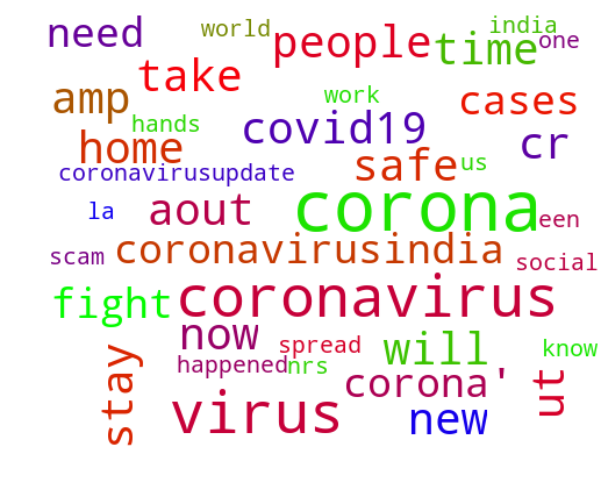

<Figure size 720x720 with 0 Axes>

In [229]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()